In [60]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


def imshow(img):
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()
def imshow2(img):
    plt.imshow(img)
    plt.show()
def hist(img):
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram)
    plt.show()
def hist_log(img):
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], np.log(histogram+1))
    plt.show()

In [2]:
img = cv2.imread('labeling/source/1_0.png')

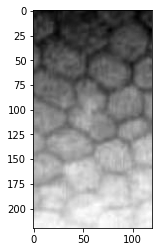

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img)
window_size = 21

## adaptiveThreshold_gaussian_lf

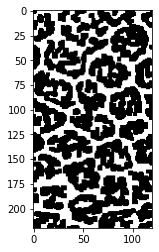

In [4]:
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, window_size,1)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
thresh_erode = cv2.morphologyEx(closing, cv2.MORPH_ERODE, np.ones((2, 2), np.uint8))
imshow(thresh_erode)

## adaptiveThreshold_mean_lf

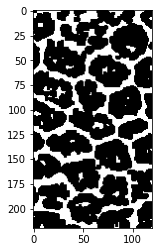

In [5]:
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, window_size,0)
thresh_erode = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, np.ones((3, 3), np.uint8))
imshow(thresh_erode)

## global_thresholding

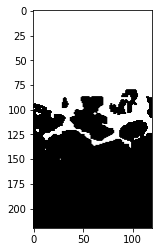

In [6]:
ret, global_thresholding = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh_erode = cv2.morphologyEx(global_thresholding, cv2.MORPH_ERODE, np.ones((2, 2), np.uint8))
imshow(thresh_erode)

## laplacian

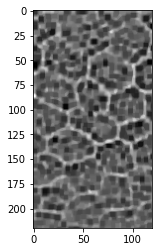

In [71]:
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=11)
closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
erode = cv2.morphologyEx(closing,cv2.MORPH_ERODE, np.ones((2, 2), np.uint8))
laplacian_opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8))
imshow(laplacian_opening)

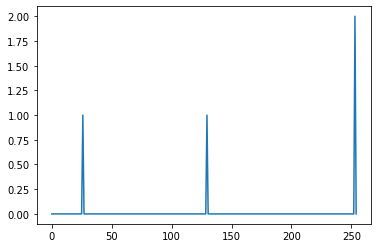

In [46]:
hist(laplacian_opening)

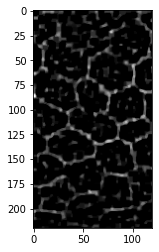

0.0


In [47]:
ret,t2 = cv2.threshold(laplacian_opening, 0,255,cv2.THRESH_TOZERO)
imshow(t2)
print(ret)

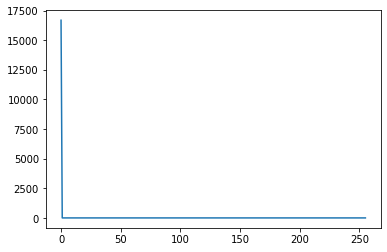

In [54]:
hist(t2)
histogram, bin_edges = np.histogram(t2, bins=256, range=(0, 256))

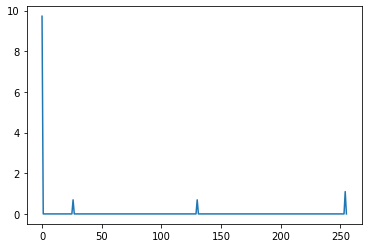

In [64]:
hist_log(t2)

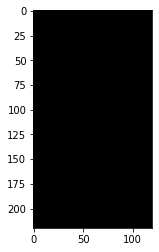

In [70]:
ret,t3 = cv2.threshold(laplacian_opening, 150,0,cv2.THRESH_BINARY_INV)
imshow(t3)